# Anchor Free简介
参考资料：
- [目标检测：Anchor-Free时代](https://zhuanlan.zhihu.com/p/62103812)
- [目标检测中的Anchor Free方法(一)](https://zhuanlan.zhihu.com/p/86270414)
- [目标检测中的Anchor Free方法(二)](https://zhuanlan.zhihu.com/p/86721091)
- [FCOS:一阶全卷积目标检测](https://zhuanlan.zhihu.com/p/63868458)
- [目标检测：FCOS（2019）](https://zhuanlan.zhihu.com/p/62869137)
- [CVPR 2020丨商汤提出Anchor-free目标检测新网络](https://zhuanlan.zhihu.com/p/136894177)
- [真Anchor Free目标检测----CenterNet详解](https://zhuanlan.zhihu.com/p/72373052)

## Anchor Based方法
当我们提到当前主流的目标检测算法时，无论是多阶段的各种RCNN和单阶段的SSD、YoloV3等等都是基于Anchor实现的。Anchor的本质是候选框，在设计了不同尺度和比例的候选框后，让深度神经网络对候选框做分类，对bbox做回归。

![file](https://images2015.cnblogs.com/blog/727161/201611/727161-20161123161223096-1040556996.png)

但是这种基于Anchor box的目标检测方法存在一些明显的缺点，比如：
- 检测表现效果对于Anchor box的尺寸、长宽比、数目非常敏感，因此Anchor box相关的超参数需要仔细的调节。
- Anchor box的尺寸和长宽比是固定的，因此，检测器在处理形变较大的候选对象时比较困难，尤其是对于小目标。预先定义的Anchor box还限制了检测器的泛化能力，因为，它们需要针对不同对象大小或长宽比进行设计。
- 为了提高召回率，需要在图像上放置密集的Anchor box。而这些Anchor box大多数属于负样本，这样造成了正负样本之间的不均衡。
- 大量的Anchor box增加了在计算交并比时计算量和内存占用。

## Anchor Free方法
那么，顾名思义，Anchor Free就是一种没有基于候选框的目标检测概念。其实Anchor Free并非一个新概念，比如YoloV1可以算是目标检测领域最早的Anchor Free模型。

在PaddleDetection模型库中，提供了一系列的Anchor Free算法，包括：

|                          | ResNet50  | ResNet50-vd | Hourglass104 |  DarkNet53
|:------------------------:|:--------:|:-------------:|:-------------:|:-------------:|
| [CornerNet-Squeeze](#CornerNet-Squeeze)  | x        |       ✓ | ✓       |x      |
| [FCOS](#FCOS)  | ✓    |      x | x      | x      |
| [TTFNet](#TTFNet) | x        |  x      |  x      | ✓      |

### FCOS一阶全卷积目标检测
在本文中，将使用`PaddleDetection/configs/anchor_free/fcos_r50_fpn_multiscale_2x.yml`对瓶装白酒的瑕疵进行目标检测。PaddleDetection文档中对FCOS算法进行了简单介绍。

> **简介:** [FCOS](https://arxiv.org/abs/1904.01355)是一种密集预测的anchor-free检测算法，使用RetinaNet的骨架，直接在feature map上回归目标物体的长宽，并预测物体的类别以及centerness（feature map上像素点离物体中心的偏移程度），centerness最终会作为权重来调整物体得分。
> 
> **特点:**  
> 
> - 利用FPN结构在不同层预测不同scale的物体框，避免了同一feature map像素点处有多个物体框重叠的情况
> - 通过center-ness单层分支预测当前点是否是目标中心，消除低质量误检

**论文地址：**

[FCOS: Fully Convolutional One-Stage Object Detection​arxiv.org](https://arxiv.org/abs/1904.01355)

**代码地址：**

[https://github.com/tianzhi0549/FCOS​github.com](https://github.com/tianzhi0549/FCOS)

![file](https://picb.zhimg.com/v2-bbec7cf563fc6c0bb981bef30bb9ca17_r.jpg)

在[FCOS:一阶全卷积目标检测](https://zhuanlan.zhihu.com/p/63868458)这篇文章中，详细介绍了FCOS的优势和具体做法。

> **FCOS优势**
> - FCOS与许多基于FCN的思想是统一的，因此可以更轻松的重复使用这些任务的思路。
> - 检测器实现了proposal free和anchor free，显著的减少了设计参数的数目。设计参数通常需要启发式调整，并且设计许多技巧。另外，通过消除锚框，新探测器完全避免了复杂的IOU计算以及训练期间锚框和真实边框之间的匹配，并将总训练内存占用空间减少了2倍左右。
> - FCOS可以作为二阶检测器的区域建议网络(RPN)，其性能明显优于基于锚点的RPN算法。
> - FCOS可以经过最小的修改便可扩展到其他的视觉任务，包括实例分割、关键点检测。

而通过[目标检测中的Anchor Free方法(二)](https://zhuanlan.zhihu.com/p/86721091)这篇文章的解读，很容易理解为什么FCOS稍作修改便可扩展到实例分割、关键点检测等其它视觉任务中。
> 按照FCOS的说法，它是把每个location都当做一个样本，如下图所示，可以看到，最左面的橙色点在棒球运动员的box内，这个点的gt实际上是该点到box的四个边缘的距离以及box的obj类别，所以最后预测出来的output是HxWxC以及HxWx4，C和4分别代表每个特征图的每个location要预测的该点所属于的类别和该点到box的边界距离。在通过这种方式得到box后，FCOS会合anchor based的方法一样进行NMS等：
> 
> ![file](https://pic3.zhimg.com/80/v2-b1dff44235f632865df3d0bb0ec5b4ed_720w.jpg)
> 
> 实际上如果不考虑Classification下面的Center-ness分支，怎么样，会不会觉得非常熟悉？在这里贴一下retinanet的网络图：
> 
> ![file](https://pic2.zhimg.com/80/v2-0f511443586899987286674a03c13f2a_720w.jpg)
> 
> 可以发现，两者最大的差别是最后输出的通道，Retinanet输出的是KA和4A(A代表anchors数量，K代表类别数量)，是对每个location位置的A个anchors预测它们的类别和相对偏移量，而FCOS则直接对格子所在的类别和产生box进行预测了，完全没有box的概念，整体上也非常接近语义分割的segmentation思想。 这样做的方法会有一个问题，就是box里面，越接近中心的位置往往效果越好，但是越靠近Box边缘，虽然理论上应该仍然是正类，但是因为往往落在obj外，预测效果不佳，对此，FCOS的解决方法是引入一个新的分支centerness，它的gt计算如下：
> 
> ![file](https://pic4.zhimg.com/80/v2-45e179efe4b05ee1732a9fffc783cc4c_720w.png)
> 
> 可以看到，如果location距离box的左边界距离和右边界距离相同，根号内第一项应该是1，同理，当距离上下边界距离一样时候，根号内第二项是1，此时，gt值为1，location恰好处于中心位置。而如果location非常接近边缘，则gt会非常小。这个分支训练以后，在inference阶段将会和classification预测的值相乘作为最终scores得分，从而抑制接近中心点的位置。 此外，FCOS还引入了多尺度的概念，如果在FPN的某个level上，t/b/l/r中的最大值大于某个阈值，则认为这个box不适合当前level的feature，从而进行排除。

### FCOS检测效果
本文使用的瓶装白酒数据集，将瓶盖和瓶身的瑕疵整合在一起，因此数据集中真实框形变非常大，比如：
![file](https://tianchi-public.oss-cn-hangzhou.aliyuncs.com/public/files/forum/157737615664628481577376156493.png)
![file](https://tianchi-public.oss-cn-hangzhou.aliyuncs.com/public/files/forum/157737616716632671577376167041.png)

使用`fcos_r50_fpn_multiscale_2x`模型在40000轮训练后（约2小时）验证集上评估指标如下，仅用很短的训练时间就取得了比较好的效果
```
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.382
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.676
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.376
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.229
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.309
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.384
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.418
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.518
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.545
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.441
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.485
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.559
```
下面介绍详细的数据集分析、数据增强和训练过程

# 安装工具库


In [ ]:
!git clone https://gitee.com/PaddlePaddle/PaddleDetection.git

Cloning into 'PaddleDetection'...
remote: Enumerating objects: 5983, done.
remote: Counting objects: 100% (5983/5983), done.
remote: Compressing objects: 100% (2963/2963), done.
remote: Total 5983 (delta 4313), reused 4043 (delta 2943), pack-reused 0
Receiving objects: 100% (5983/5983), 20.62 MiB | 3.50 MiB/s, done.
Resolving deltas: 100% (4313/4313), done.
Checking connectivity... done.


In [ ]:
# 中文字体镜像
!git clone https://gitee.com/mirrors/noto-cjk.git

Cloning into 'noto-cjk'...
remote: Enumerating objects: 800, done.
remote: Counting objects: 100% (800/800), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 800 (delta 642), reused 800 (delta 642)s      
Receiving objects: 100% (800/800), 2.10 GiB | 24.89 MiB/s, done.
Resolving deltas: 100% (642/642), done.
Checking connectivity... done.
Checking out files: 100% (156/156), done.


In [ ]:
# 安装CocoAPI
# !git clone https://gitee.com/firefox1200/cocoapi.git
# !cd cocoapi/PythonAPI && make install

In [ ]:
# 安装模型库依赖
!pip install -r PaddleDetection/requirements.txt
!pip install scikit-image
!pip install seaborn
!pip install albumentations

# 数据准备

In [ ]:
# 解压数据集
!unzip data/data19028/round1_train1.zip -d ./data
!unzip data/data19028/round1_testA.zip -d ./data

In [ ]:
!mkdir PaddleDetection/dataset/coco/annotations
!mkdir PaddleDetection/dataset/coco/train2017
!mkdir PaddleDetection/dataset/coco/val2017
!mkdir PaddleDetection/dataset/coco/test2017

In [ ]:
!cp data/chongqing1_round1_testA_20191223/images/*.jpg -d PaddleDetection/dataset/coco/test2017

In [ ]:
# 数据清洗与数据增强相关工具库引入
%matplotlib inline
from urllib.request import urlopen
import os
import pandas as pd
import numpy as np
import imageio
import cv2
import json
from matplotlib import pyplot as plt
from pandas.io.json import json_normalize
import albumentations as A
from tqdm import tnrange, tqdm_notebook,tqdm
import time

# 数据集介绍

[数智重庆.全球产业赋能创新大赛【赛场一】](https://tianchi.aliyun.com/competition/entrance/231763/information)
## EDA
完整内容参考：[数据的简单分析和可视](https://tianchi.aliyun.com/notebook-ai/detail?spm=5176.12586969.1002.15.125b13e2C6y39u&postId=86218)

In [ ]:
# 载入标注json文件
with open('data/chongqing1_round1_train1_20191223/annotations.json') as f:
    a=json.load(f)

In [ ]:
co=0
for c in a['annotations']:
    if c['image_id']==2162:
        co+=1
co

21

In [ ]:
print('标签类别:')
print('类别数量：',len(a['categories']))
a['categories']

标签类别:
类别数量： 11


[{'supercategory': '瓶盖破损', 'id': 1, 'name': '瓶盖破损'},
 {'supercategory': '喷码正常', 'id': 9, 'name': '喷码正常'},
 {'supercategory': '瓶盖断点', 'id': 5, 'name': '瓶盖断点'},
 {'supercategory': '瓶盖坏边', 'id': 3, 'name': '瓶盖坏边'},
 {'supercategory': '瓶盖打旋', 'id': 4, 'name': '瓶盖打旋'},
 {'supercategory': '背景', 'id': 0, 'name': '背景'},
 {'supercategory': '瓶盖变形', 'id': 2, 'name': '瓶盖变形'},
 {'supercategory': '标贴气泡', 'id': 8, 'name': '标贴气泡'},
 {'supercategory': '标贴歪斜', 'id': 6, 'name': '标贴歪斜'},
 {'supercategory': '喷码异常', 'id': 10, 'name': '喷码异常'},
 {'supercategory': '标贴起皱', 'id': 7, 'name': '标贴起皱'}]

In [ ]:
print('训练集图片数量：',len(a['images']))
print('训练集标签数量：',len(a['annotations']))

训练集图片数量： 4516
训练集标签数量： 6945


In [ ]:
total=[]
for img in a['images']:
    hw=(img['height'],img['width'])
    total.append(hw)
unique=set(total)
for k in unique:
    print('长宽为(%d,%d)的图片数量为：'%k,total.count(k))

长宽为(492,658)的图片数量为： 4105
长宽为(3000,4096)的图片数量为： 411


In [ ]:
ids=[]
images_id=[]
for i in a['annotations']:
    ids.append(i['id'])
    images_id.append(i['image_id'])
print('训练集图片数量:',4516)
print('unique id 数量：',len(set(ids)))
print('unique image_id 数量',len(set(images_id)))

训练集图片数量: 4516
unique id 数量： 2011
unique image_id 数量 4516


In [ ]:
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r"/home/aistudio/noto-cjk/NotoSerifSC-Light.otf", size=12)
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['font.family']='sans-serif'
plt.rcParams['figure.figsize'] = (10.0, 10.0)

In [ ]:
##创建类别标签字典
category_dic=dict([(i['id'],i['name']) for i in a['categories']])
category_dic

{1: '瓶盖破损',
 9: '喷码正常',
 5: '瓶盖断点',
 3: '瓶盖坏边',
 4: '瓶盖打旋',
 0: '背景',
 2: '瓶盖变形',
 8: '标贴气泡',
 6: '标贴歪斜',
 10: '喷码异常',
 7: '标贴起皱'}

In [ ]:
counts_label=dict([(i['name'],0) for i in a['categories']])
for i in a['annotations']:
    counts_label[category_dic[i['category_id']]]+=1
counts_label

{'瓶盖破损': 1619,
 '喷码正常': 489,
 '瓶盖断点': 614,
 '瓶盖坏边': 656,
 '瓶盖打旋': 480,
 '背景': 1170,
 '瓶盖变形': 705,
 '标贴气泡': 443,
 '标贴歪斜': 186,
 '喷码异常': 199,
 '标贴起皱': 384}

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


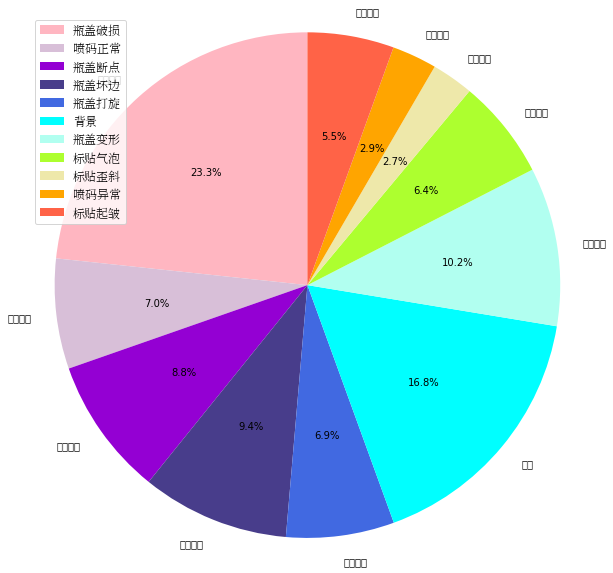

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib
plt.rcParams['font.family']= myfont.get_family()
plt.rcParams['font.sans-serif'] = myfont.get_name()
plt.rcParams['axes.unicode_minus'] = False

label_list = counts_label.keys()    # 各部分标签
size = counts_label.values()    # 各部分大小
color = ['#FFB6C1', '#D8BFD8', '#9400D3', '#483D8B', '#4169E1', '#00FFFF','#B1FFF0','#ADFF2F','#EEE8AA','#FFA500','#FF6347']     # 各部分颜色
# explode = [0.05, 0, 0]   # 各部分突出值
"""
绘制饼图
explode：设置各部分突出
label:设置各部分标签
labeldistance:设置标签文本距圆心位置，1.1表示1.1倍半径
autopct：设置圆里面文本
shadow：设置是否有阴影
startangle：起始角度，默认从0开始逆时针转
pctdistance：设置圆内文本距圆心距离
返回值
l_text：圆内部文本，matplotlib.text.Text object
p_text：圆外部文本
"""
# patches, l_text, p_text = plt.pie(size, explode=explode, colors=color, labels=label_list, labeldistance=1.1, autopct="%1.1f%%", shadow=False, startangle=90, pctdistance=0.6)
patches, l_text, p_text = plt.pie(size, labels=label_list, colors=color, labeldistance=1.1, autopct="%1.1f%%", shadow=False, startangle=90, pctdistance=0.6)
plt.axis("equal")    # 设置横轴和纵轴大小相等，这样饼才是圆的
# for t in l_text:
#     t.get_font_properties()
#     print(t.get_font_properties())
plt.legend(prop=myfont)
plt.show()

## 数据清洗
参考[数据清洗的简单demo](https://tianchi.aliyun.com/forum/postDetail?spm=5176.12586969.1002.12.125b13e2C6y39u&postId=87373)

In [ ]:
DATASET_PATH = 'data/chongqing1_round1_train1_20191223'
IMG_PATH = 'data/chongqing1_round1_train1_20191223/images'

# 先做一些数据清洗
with open(os.path.join(DATASET_PATH, 'annotations.json')) as f:
    json_file = json.load(f)
    
print('所有图片的数量：', len(json_file['images']))
print('所有标注的数量：', len(json_file['annotations']))

bg_imgs = set()  # 所有标注中包含背景的图片 id
for c in json_file['annotations']:
    if c['category_id'] == 0:
        bg_imgs.add(c['image_id'])
        
print('所有标注中包含背景的图片数量：', len(bg_imgs))

bg_only_imgs = set()  # 只有背景的图片的 id
for img_id in bg_imgs:
    co = 0
    for c in json_file['annotations']:
        if c['image_id'] == img_id:
            co += 1
    if co == 1:
        bg_only_imgs.add(img_id)
print('只包含背景的图片数量：', len(bg_only_imgs))

images_to_be_deleted = []
for img in json_file['images']:
    if img['id'] in bg_only_imgs:
        images_to_be_deleted.append(img)
# 删除的是只有一个标注，且为 background 的的图片
print('待删除图片的数量：', len(images_to_be_deleted))
for img in images_to_be_deleted:
    json_file['images'].remove(img)


print('处理之后图片的数量：', len(json_file['images']))

ann_to_be_deleted = []
for c in json_file['annotations']:
    if c['category_id'] == 0:
        ann_to_be_deleted.append(c)
        
print('待删除标注的数量：', len(ann_to_be_deleted))
for img in ann_to_be_deleted:
    json_file['annotations'].remove(img)

print('处理之后标注的数量：', len(json_file['annotations']))

bg_cate = {'supercategory': '背景', 'id': 0, 'name': '背景'}
json_file['categories'].remove(bg_cate)
json_file['categories']

for idx in range(len(json_file['annotations'])):
    json_file['annotations'][idx]['id'] = idx
    
with open(os.path.join(DATASET_PATH, 'annotations_washed.json'), 'w') as f:
    json.dump(json_file, f, indent=4)


所有图片的数量： 4516
所有标注的数量： 6945
所有标注中包含背景的图片数量： 1168
只包含背景的图片数量： 1145
待删除图片的数量： 1145
处理之后图片的数量： 3371
待删除标注的数量： 1170
处理之后标注的数量： 5775


# Albumentations图片数据增强库
- [项目地址](https://github.com/albumentations-team/albumentations)
- [帮助文档](https://albumentations.readthedocs.io/en/latest/)
## 安装方法
- `pip install albumentations`
## 目标检测数据增强
- 相对于比较简单的图片分类场景，目标检测数据集数据增强还要考虑到`bboxes`的变换
- `albumentations`和`imgaug`都可以实现目标检测数据增强
- 在Pascal VOC数据集上，已有基于`imgaug`的数据增强实现，参考 [imgaug--Bounding Boxes augment](https://github.com/xinyu-ch/Data-Augment)
> 注：数据增加在目标检测数据集上并不总是起到正面效果，需要根据数据集的实际情况进行调整，本项目的做法更多只是效果演示。
> 参考资料：
> - [Bag of Freebies for Training Object Detection Neural Networks](https://arxiv.org/pdf/1902.04103.pdf)
> - [李沐等将目标检测绝对精度提升 5%，不牺牲推理速度](https://zhuanlan.zhihu.com/p/56848556)

In [ ]:
with open(os.path.join(DATASET_PATH, 'annotations_washed.json'),'r') as load_f:
    load_dict = json.load(load_f)
#     print(len(load_dict['images']))

images_info = json_normalize(load_dict['images'])
images_info.head()

,file_name,height,id,width
0,img_0017151.jpg,492,1,658
1,img_0001675.jpg,492,2,658
2,img_0020680.jpg,492,3,658
3,img_0015046.jpg,492,4,658
4,img_0004341.jpg,492,5,658


## Albumentations目标检测数据增强示例
- 参考[example_bboxes2.ipynb](https://github.com/albumentations-team/albumentations/blob/master/notebooks/example_bboxes2.ipynb)的示例改造，该示例中，数据增强即使用镜像也不会丢失`bboxes`
- 每次数据增强的结果都会不一样，因为变换方法里设置了随机概率
- 数据增强变换后的图片信息和`bboxes`都很容易获取
- 保存转换后的图片时，如果用`opencv`保存图片需要进行颜色通道的转换

In [ ]:
def get_aug(aug, min_area=0., min_visibility=0.):
    return A.Compose(aug, A.BboxParams(format='coco', min_area=min_area, 
                                       min_visibility=min_visibility, label_fields=['category_id']))

In [ ]:
# Functions to visualize bounding boxes and class labels on an image. 
# Based on https://github.com/facebookresearch/Detectron/blob/master/detectron/utils/vis.py

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)

In [ ]:
# 这里涉及到中文字符识别的问题，暂时先用数字表示缺陷类别
category_id_to_name = {1: '1', 2: '2',3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '10'}

In [ ]:
for c in load_dict['images']:
    if c['id'] == 3:
        im_name = c['file_name']
        im_h = c['height']
        im_w = c['width']
        im_id = c['id']
    im_bboxes = []
    im_category = []
for c in load_dict['annotations']:
    if c['image_id'] == im_id:
        bbox = c['bbox']
        category = c['category_id']
        im_bboxes.append(bbox)
        im_category.append(category)
image = imageio.imread(os.path.join(IMG_PATH, im_name))
annotations = {'image': image, 'bboxes': im_bboxes, 'category_id': im_category}

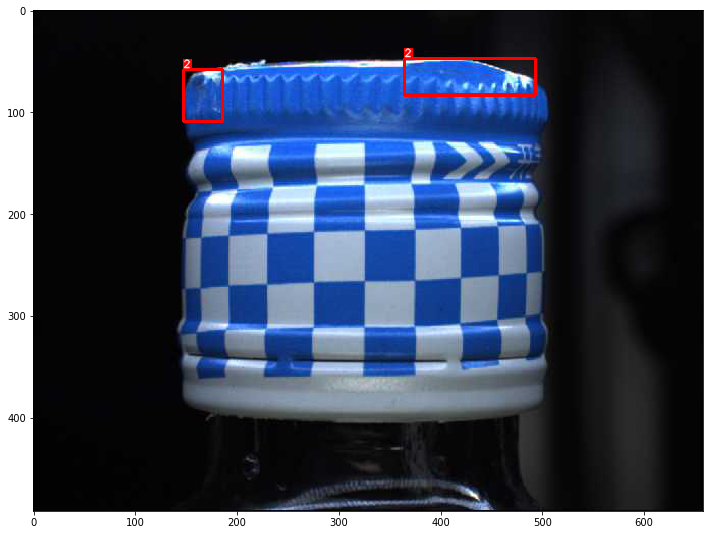

In [ ]:
visualize(annotations, category_id_to_name)

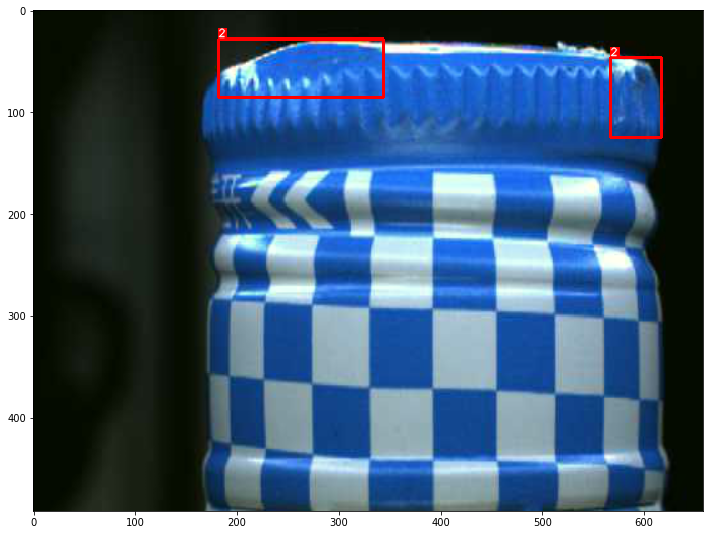

In [ ]:
aug = get_aug([
    A.HorizontalFlip(p=0.5),
    A.RandomSizedBBoxSafeCrop(width=im_w, height=im_h, erosion_rate=0.2),
    A.RGBShift(p=0.5),
    A.Blur(blur_limit=11, p=0.5),
    A.RandomBrightness(p=0.5),
    A.CLAHE(p=0.5),
])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

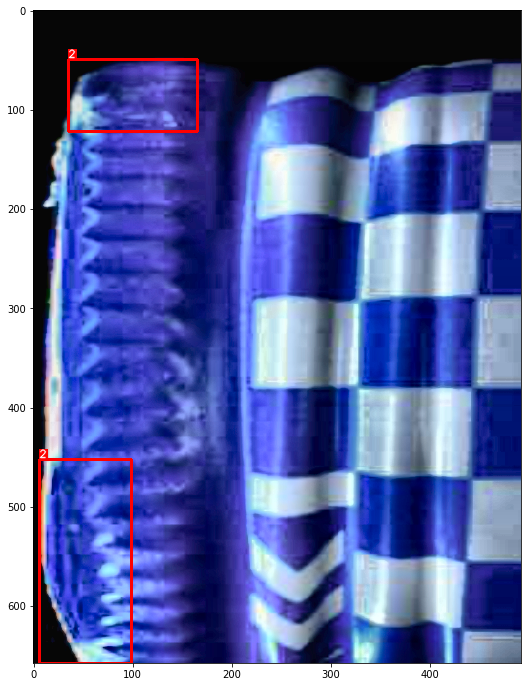

In [ ]:
aug2 = get_aug([
    A.RandomContrast(p=0.5),
    A.RandomSizedBBoxSafeCrop(width=658, height=492, erosion_rate=0.2),
    A.Transpose(p=0.5),
    A.RandomBrightness(p=0.5),
    A.CLAHE(p=0.5),
])
augmented2 = aug2(**annotations)
visualize(augmented2, category_id_to_name)

In [ ]:
# 查看数据增强的结果，可读性很强，可以直接解析出转换后的bboxes
augmented

{'image': array([[[ 4, 11,  0],
         [ 4, 11,  0],
         [ 4, 11,  0],
         ...,
         [ 6, 13,  0],
         [ 6, 13,  0],
         [ 6, 13,  0]],
 
        [[ 4, 11,  0],
         [ 4, 11,  0],
         [ 4, 11,  0],
         ...,
         [ 6, 13,  0],
         [ 6, 13,  0],
         [ 6, 13,  0]],
 
        [[ 4, 11,  0],
         [ 4, 11,  0],
         [ 4, 11,  0],
         ...,
         [ 6, 13,  0],
         [ 6, 13,  0],
         [ 6, 13,  0]],
 
        ...,
 
        [[ 4, 11,  0],
         [ 4, 11,  0],
         [ 4, 11,  0],
         ...,
         [ 4, 11,  0],
         [ 4, 11,  0],
         [ 4, 11,  0]],
 
        [[ 4, 11,  0],
         [ 4, 11,  0],
         [ 4, 11,  0],
         ...,
         [ 4, 11,  0],
         [ 4, 11,  0],
         [ 4, 11,  0]],
 
        [[ 4, 11,  0],
         [ 4, 11,  0],
         [ 4, 11,  0],
         ...,
         [ 4, 11,  0],
         [ 4, 11,  0],
         [ 4, 11,  0]]], dtype=uint8),
 'bboxes': [(182.4282982791587,
 

In [ ]:
def save_aug(annotations):
    img = annotations['image'].copy()
    cv2.imwrite(os.path.join(DATASET_PATH, 'aug.jpg'),cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

In [ ]:
save_aug(augmented)

## COCO数据集批量扩充
感觉有几个难点：
- 如何在遍历全部图像的同时获得对应的`bboxes`并拼接
- 数据增强的图片命名递增并与`bboxes`等信息拼接成新`json`
- 数据增强的图片`id`如何与原`json`文件衔接
- 像素点的数据增强问题，在该场景中还没遇到，暂时先不考虑
### 确认清洗后的`json`文件信息
这部分比较关键，因为调试过程中需要反复确认

In [ ]:
len(load_dict['images'])

3371

In [ ]:
len(load_dict['annotations'])

5775

### 遍历、数据增强、生成数据增强后的`dict`
- 注意遍历`json`中每张图片的写法
    - 这里引入了`tqdm`包，但有的`notebook`上进度条会一直重复打印
- 先找到图，再找到`bboxes`拼接
    - 此处不止是否能提升，感觉多循环了一次
- 数据增强并保存文件
    - 此处相对简单，根据前面的方法，将文件保存用一行代码解决
- 生成数据增强后的dict
    - 生成图片这部分相对简单，注意这里有个细节，原标注图片`id`是从1开始，不是0，并且不连续，为避免重复，将数据增强的图片`id`从10001开始标记
    - 生成`annotations`还需要再遍历一遍
    - 注意`annotations`中`id`递增的写法，需要引入`count`计数
    - 注意`annotations`中`area`的计算，`bounding box`返回时是`(x_min, y_min, w, h)`

In [ ]:
data = load_dict
data_aug={}
data_aug['images'] = []
# data_aug['info']=data['info']
# data_aug['license']=[]
# data_aug['categories']=data['categories']
data_aug['annotations'] = []
count = 0
for index, item in enumerate(tqdm(load_dict['images'])):
    # 快速测试几条
    # if index < 6:
    im_name = item['file_name']
    im_h = item['height']
    im_w = item['width']
    im_id = item['id']
    im_bboxes = []
    im_category = []
    for c in load_dict['annotations']:
        if c['image_id'] == im_id:
            bbox = c['bbox']
            category = c['category_id']
            im_bboxes.append(bbox)
            im_category.append(category)
    image = imageio.imread(os.path.join(IMG_PATH, im_name))
    anno = {'image': image, 'height': im_h, 'width': im_w,'bboxes': im_bboxes, 'category_id': im_category}
    aug = get_aug([
    A.HorizontalFlip(p=0.5),
    A.RandomSizedBBoxSafeCrop(width=im_w, height=im_h, erosion_rate=0.2),
    A.RGBShift(p=0.5),
    A.Blur(blur_limit=11, p=0.5),
    A.RandomBrightness(p=0.5),
    A.CLAHE(p=0.5),
])
    augmented = aug(**anno)
    # 保存数据增强图片
    cv2.imwrite(os.path.join(IMG_PATH, 'aug_%d.jpg' % index),cv2.cvtColor(augmented['image'], cv2.COLOR_RGB2BGR))
    # 生成新的数据字典
    dict1={'file_name': 'aug_%d.jpg'% index, 'height': im_h, 'id': 10000+index+1, 'width': im_w}
    data_aug['images'].append(dict1)
    for idx, bbox in enumerate(augmented['bboxes']):
        dict2={'area': bbox[2]*bbox[3],'iscrowd': 0,'image_id': dict1['id'],
                'bbox': [bbox[0], bbox[1], bbox[2], bbox[3]],
               'category_id': im_category[idx],'id': 10000+count}
        data_aug['annotations'].append(dict2)
        count += 1
    time.sleep(0.1)
#     print(index, anno)

100%|██████████| 3371/3371 [10:27<00:00,  5.37it/s]


### 确认数据增强结果
- 此处需要反复确认
- 数据增强后的图片数、缺陷数应该要与原来一致
- 除了`id`和`bboxes`的变化，增强前后应该保持一致
    - 重点观察缺陷类型
    - 观察图片大小
- 确认新生成的图片和缺陷`id`标注是否正确

In [ ]:
data_aug

In [ ]:
# 简单确认下数据增强是否正确执行
total=[]
for img in data_aug['images']:
    hw=(img['height'],img['width'])
    total.append(hw)
unique=set(total)
for k in unique:
    print('长宽为(%d,%d)的图片数量为：'%k,total.count(k))

长宽为(492,658)的图片数量为： 2970
长宽为(3000,4096)的图片数量为： 401


In [ ]:
len(data_aug['images'])

3371

In [ ]:
len(data_aug['annotations'])

5775

### 生成数据增强后的标注文件
- 这里用到了具有相同`key`的`dict`合并方法
- 合并后`load_dict`新增了数据增强后的信息

In [ ]:
def func(dict1,dict2):
    for i,j in dict2.items():
        if i in dict1.keys():
            dict1[i] += j
        else:
            dict1.update({f'{i}' : dict2[i]})
    return dict1

In [ ]:
func(load_dict,data_aug)

In [ ]:
print(len(load_dict['images']))
print(len(load_dict['annotations']))

6742
11550


In [ ]:
with open(os.path.join(DATASET_PATH, 'annotations_aug.json'), 'w') as f:
    json.dump(load_dict, f)

## 训练集和验证集划分

- 这里用最简单的逻辑，每5张图分1张到验证集，另外4张放训练集

- 也可以参考[mmdetection框架：清洗数据后将数据分为训练集和测试集并形成相应的annotations.json文件](https://tianchi.aliyun.com/forum/postDetail?spm=5176.12586969.1002.39.125b13e2C6y39u&postId=88342)

In [ ]:
import os, sys, zipfile
import urllib.request
import shutil
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import json

# person_keypoints_val2017.json  # Object Keypoint 类型的标注格式
# captions_val2017.json  # Image Caption的标注格式

def make_val(image_dir,annotation_file,train_dataset=True):
    
    data=json.load(open(annotation_file,'r'))
    data_3={}
    data_3['images'] = []
    data_3['info']=data['info']
    data_3['license']=[]
    # data_3['categories']=[{'supercategory': '瓶盖破损', 'id': 1, 'name': '瓶盖破损'}, 
    # {'supercategory': '喷码正常', 'id': 9, 'name': '喷码正常'},
    # {'supercategory': '瓶盖断点', 'id': 5, 'name': '瓶盖断点'},
    # {'supercategory': '瓶盖坏边', 'id': 3, 'name': '瓶盖坏边'},
    # {'supercategory': '瓶盖打旋', 'id': 4, 'name': '瓶盖打旋'},
    # {'supercategory': '瓶盖变形', 'id': 2, 'name': '瓶盖变形'}, 
    # {'supercategory': '标贴气泡', 'id': 8, 'name': '标贴气泡'},
    # {'supercategory': '标贴歪斜', 'id': 6, 'name': '标贴歪斜'},
    # {'supercategory': '喷码异常', 'id': 10, 'name': '喷码异常'}, 
    # {'supercategory': '标贴起皱', 'id': 7, 'name': '标贴起皱'}]
    data_3['categories']=data['categories']
    t1=[]
    t2=[]
    if train_dataset==True:
        for i in tqdm(range(len(data['images']))): 
            if i % 5 != 0:
                data_2={}
                data_2['images']=[data['images'][i]] # 只提取第一张图片
                t1.append(data['images'][i])
                annotation=[]
                
                # 通过imgID 找到其所有对象
                imgID=data_2['images'][0]['id']
                for ann in data['annotations']:
                    if ann['image_id']==imgID:
                        annotation.append(ann)
                        t2.append(ann)
            
                shutil.copy(os.path.join(image_dir, data_2['images'][0]['file_name']),"PaddleDetection/dataset/coco/train2017")
        data_3['images']=t1
        data_3['annotations']=t2
        # 保存到新的JSON文件，便于查看数据特点
        json.dump(data_3,open('PaddleDetection/dataset/coco/annotations/instances_train2017.json','w'),indent=4) # indent=4 更加美观显示
    else:
        for i in tqdm(range(len(data['images']))): 
            if i % 5 == 0:
                data_2={}
                data_2['images']=[data['images'][i]] # 只提取第一张图片
                # t1.append(data_2['images'])
                annotation=[]
                
                # 通过imgID 找到其所有对象
                imgID=data_2['images'][0]['id']
                for ann in data['annotations']:
                    if ann['image_id']==imgID:
                        annotation.append(ann)
                        t2.append(ann)
                for im in data['images']:
                    if im['id'] ==imgID:
                        t1.append(im)
                data_2['annotations']=annotation
                shutil.copy(os.path.join(image_dir, data_2['images'][0]['file_name']),"PaddleDetection/dataset/coco/val2017")
        data_3['images']=t1
        data_3['annotations']=t2
        # 保存到新的JSON文件，便于查看数据特点
        json.dump(data_3,open('PaddleDetection/dataset/coco/annotations/instances_val2017.json','w'),indent=4, ensure_ascii=False) # indent=4 更加美观显示

In [ ]:
image_dir='./data/chongqing1_round1_train1_20191223/images/'
annotation_file='./data/chongqing1_round1_train1_20191223/annotations_aug.json' # # Object Instance 类型的标注
# 生成验证集
make_val(image_dir,annotation_file,False)
# 生成测试集
make_val(image_dir,annotation_file,True)

100%|██████████| 6742/6742 [00:05<00:00, 1257.15it/s]


### 添加segmentation字段

In [ ]:
import json

def add_seg(json_anno):
    new_json_anno = []
    for c_ann in json_anno:
        c_category_id = c_ann['category_id']
        if not c_category_id:
            continue
        bbox = c_ann['bbox']
        c_ann['segmentation'] = []
        seg = []
        #bbox[] is x,y,w,h
        #left_top
        seg.append(bbox[0])
        seg.append(bbox[1])
        #left_bottom
        seg.append(bbox[0])
        seg.append(bbox[1] + bbox[3])
        #right_bottom
        seg.append(bbox[0] + bbox[2])
        seg.append(bbox[1] + bbox[3])
        #right_top
        seg.append(bbox[0] + bbox[2])
        seg.append(bbox[1])

        c_ann['segmentation'].append(seg)
        new_json_anno.append(c_ann)
    return new_json_anno

In [ ]:
json_file = './PaddleDetection/dataset/coco/annotations/instances_train2017.json'
with open(json_file) as f:
    a=json.load(f)
a['annotations'] = add_seg(a['annotations'])

with open("./PaddleDetection/dataset/coco/annotations/instances_train2017.json","w") as f:
    json.dump(a, f)

In [ ]:
json_file = './PaddleDetection/dataset/coco/annotations/instances_val2017.json'
with open(json_file) as f:
    a=json.load(f)
a['annotations'] = add_seg(a['annotations'])

with open("./PaddleDetection/dataset/coco/annotations/instances_val2017.json","w") as f:
    json.dump(a, f)

# 数据集计算
## 计算数据集的像素均值和标准差
- 模型库默认使用COCO数据集RGB均值和标准差
- 根据自己数据的实际情况可以进行调整

In [ ]:
ims_path='data/chongqing1_round1_train1_20191223/images/'# 图像数据集的路径
filepath = 'data/chongqing1_round1_testA_20191223/images/' # 数据集目录
pathDir = os.listdir(filepath)
 
CNum = 3000  # select images 取前10000张图片作为计算样本
 
img_h, img_w = 32, 32
imgs = np.zeros([img_w, img_h, 3, 1])
means, stdevs = [], []
 
i = 0
for item in pathDir:
    img_path = os.path.join(filepath, item)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (img_h, img_w)) # 将图片进行裁剪[32,32]
    img = img[:, :, :, np.newaxis]
    imgs = np.concatenate((imgs, img), axis=3)
    # print(i)
    i = i + 1
imgs = imgs.astype(np.float32) / 255.
 
for i in tqdm(range(3)):
    pixels = imgs[:, :, i, :].ravel()  # flatten
    means.append(np.mean(pixels))
    stdevs.append(np.std(pixels))
 
# cv2 : BGR
means.reverse()  # BGR --> RGB
stdevs.reverse()
 
print("normMean = {}".format(means))
print("normStd = {}".format(stdevs))
print('transforms.Normalize(normMean = {}, normStd = {})'.format(means, stdevs))

100%|██████████| 3/3 [00:00<00:00, 68.22it/s]


normMean = [0.17554183, 0.21981199, 0.30276033]
normStd = [0.23892678, 0.25779527, 0.32540858]
transforms.Normalize(normMean = [0.17554183, 0.21981199, 0.30276033], normStd = [0.23892678, 0.25779527, 0.32540858])


# 开始训练
参考配置文件`PaddleDetection/configs/anchor_free/fcos_r50_fpn_multiscale_2x.yml`
```YAML
architecture: FCOS
max_iters: 180000
use_gpu: true
snapshot_iter: 20000
log_smooth_window: 200
log_iter: 200
save_dir: output
pretrain_weights: https://paddle-imagenet-models-name.bj.bcebos.com/ResNet50_cos_pretrained.tar
metric: COCO
weights: output/fcos_r50_fpn_multiscale_2x/model_final
num_classes: 10 # 修改类别数

FCOS:
  backbone: ResNet
  fpn: FPN
  fcos_head: FCOSHead

ResNet:
  norm_type: affine_channel
  norm_decay: 0.
  depth: 50
  feature_maps: [3, 4, 5]
  freeze_at: 2

FPN:
  min_level: 3
  max_level: 7
  num_chan: 256
  use_c5: false
  spatial_scale: [0.03125, 0.0625, 0.125]
  has_extra_convs: true

FCOSHead:
  num_classes: 10
  fpn_stride: [8, 16, 32, 64, 128]
  num_convs: 4
  norm_type: "gn"
  fcos_loss: FCOSLoss
  norm_reg_targets: True
  centerness_on_reg: True
  use_dcn_in_tower: False
  nms: MultiClassNMS

MultiClassNMS:
  score_threshold: 0.025
  nms_top_k: 1000
  keep_top_k: 100
  nms_threshold: 0.6
  background_label: -1

FCOSLoss:
  loss_alpha: 0.25
  loss_gamma: 2.0
  iou_loss_type: "giou"
  reg_weights: 1.0

LearningRate:
  base_lr: 0.000025 # 调小学习率，避免loss出现nan
  schedulers:
  - !PiecewiseDecay
    gamma: 0.1
    milestones: [120000, 160000]
  - !LinearWarmup
    start_factor: 0.3333333333333333
    steps: 500

OptimizerBuilder:
  optimizer:
    momentum: 0.9
    type: Momentum
  regularizer:
    factor: 0.0001
    type: L2

TrainReader:
  inputs_def:
    fields: ['image', 'im_info', 'fcos_target']
  dataset:
    !COCODataSet
    image_dir: train2017
    anno_path: annotations/instances_train2017.json
    dataset_dir: dataset/coco
    with_background: false
  sample_transforms:
  - !DecodeImage
    to_rgb: true
  - !RandomFlipImage
    prob: 0.5
  - !NormalizeImage
    is_channel_first: false
    is_scale: true
    mean:  [0.17554183, 0.21981199, 0.30276033] # 数据集计算结果
    std: [0.23892678, 0.25779527, 0.32540858] # 数据集计算结果
  - !ResizeImage
    target_size: [640, 672, 704, 736, 768, 800]
    max_size: 1333
    interp: 1
    use_cv2: true
  - !Permute
    to_bgr: false
    channel_first: true
  batch_transforms:
  - !PadBatch
    pad_to_stride: 128
    use_padded_im_info: false
  - !Gt2FCOSTarget
    object_sizes_boundary: [64, 128, 256, 512]
    center_sampling_radius: 1.5
    downsample_ratios: [8, 16, 32, 64, 128]
    norm_reg_targets: True
  batch_size: 2
  shuffle: true
  worker_num: 4
  use_process: false

EvalReader:
  inputs_def:
    fields: ['image', 'im_id', 'im_shape', 'im_info']
  dataset:
    !COCODataSet
    image_dir: val2017
    anno_path: annotations/instances_val2017.json
    dataset_dir: dataset/coco
    with_background: false
  sample_transforms:
  - !DecodeImage
    to_rgb: true
    with_mixup: false
  - !NormalizeImage
    is_channel_first: false
    is_scale: true
    mean:  [0.17554183, 0.21981199, 0.30276033] # 数据集计算结果
    std: [0.23892678, 0.25779527, 0.32540858] # 数据集计算结果
  - !ResizeImage
    target_size: 800
    max_size: 1333
    interp: 1
    use_cv2: true
  - !Permute
    channel_first: true
    to_bgr: false
  batch_transforms:
  - !PadBatch
    pad_to_stride: 128
    use_padded_im_info: true
  batch_size: 1
  shuffle: false
  worker_num: 2
  use_process: false

TestReader:
  inputs_def:
    # set image_shape if needed
    fields: ['image', 'im_id', 'im_shape', 'im_info']
  dataset:
    !ImageFolder
    anno_path: annotations/instances_val2017.json
    with_background: false
  sample_transforms:
  - !DecodeImage
    to_rgb: true
    with_mixup: false
  - !NormalizeImage
    is_channel_first: false
    is_scale: true
    mean:  [0.17554183, 0.21981199, 0.30276033] # 数据集计算结果
    std: [0.23892678, 0.25779527, 0.32540858] # 数据集计算结果
  - !ResizeImage 
    interp: 1
    max_size: 1333
    target_size: 800
    use_cv2: true
  - !Permute
    channel_first: true
    to_bgr: false
  batch_transforms:
  - !PadBatch
    pad_to_stride: 128
    use_padded_im_info: true
  batch_size: 1
  shuffle: false
```

In [1]:
%set_env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


In [2]:
%cd PaddleDetection/

/home/aistudio/PaddleDetection


In [ ]:
%run tools/train.py -c configs/anchor_free/fcos_r50_fpn_multiscale_2x.yml --eval

In [ ]:
%run tools/eval.py -c configs/anchor_free/fcos_r50_fpn_multiscale_2x.yml \
                   -o weights=output/fcos_r50_fpn_multiscale_2x/40000 

2020-08-10 23:51:48,170-INFO: places would be ommited when DataLoader is not iterable


loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


2020-08-10 23:51:49,733-INFO: Test iter 0
2020-08-10 23:51:54,622-INFO: Test iter 100
2020-08-10 23:51:59,328-INFO: Test iter 200
2020-08-10 23:52:04,155-INFO: Test iter 300
2020-08-10 23:52:08,861-INFO: Test iter 400
2020-08-10 23:52:13,559-INFO: Test iter 500
2020-08-10 23:52:20,537-INFO: Test iter 600
2020-08-10 23:52:52,341-INFO: Test iter 700
2020-08-10 23:52:57,015-INFO: Test iter 800
2020-08-10 23:53:01,717-INFO: Test iter 900
2020-08-10 23:53:06,410-INFO: Test iter 1000
2020-08-10 23:53:11,106-INFO: Test iter 1100
2020-08-10 23:53:15,758-INFO: Test iter 1200
2020-08-10 23:53:32,903-INFO: Test iter 1300
2020-08-10 23:53:52,934-INFO: Test finish iter 1348
2020-08-10 23:53:52,935-INFO: Total number of images: 1348, inference time: 10.923076573245925 fps.


loading annotations into memory...
Done (t=0.30s)
creating index...
index created!


2020-08-10 23:53:54,437-INFO: Start evaluate...


Loading and preparing results...
DONE (t=0.80s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=4.38s).
Accumulating evaluation results...
DONE (t=1.05s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.382
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.676
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.376
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.229
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.309
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.384
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.418
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.518
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.545
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

# 预测效果
直接修改`PaddleDetection/ppdet/utils/coco_eval.py`的默认coco类别信息
```
def coco17_category_info(with_background=True):
    """
    Get class id to category id map and category id
    to category name map of COCO2017 dataset

    Args:
        with_background (bool, default True):
            whether load background as class 0.
    """
    clsid2catid = {
        1: 1,
        2: 2,
        3: 3,
        4: 4,
        5: 5,
        6: 6,
        7: 7,
        8: 8,
        9: 9,
        10: 10
    }

    catid2name = {
        0: 'background',
        1: 'pinggaiposun',
        2: 'pinggaibianxing',
        3: 'pinggaihuaibian',
        4: 'pinggaidaxuan',
        5: 'pinggaiduandian',
        6: 'biaotiewaixie',
        7: 'biaotieqizhou',
        8: 'biaotieqipao',
        9: 'penmazhengchang',
        10: 'penmayichang'
    }

    if not with_background:
        clsid2catid = {k - 1: v for k, v in clsid2catid.items()}
        catid2name.pop(0)
    else:
        clsid2catid.update({0: 0})

    return clsid2catid, catid2name
```

In [4]:
%run tools/infer.py -c configs/anchor_free/fcos_r50_fpn_multiscale_2x.yml \
                      --infer_img=dataset/coco/test2017/img_0043740.jpg \
                      --output_dir=infer_output/ \
                      --draw_threshold=0.5 \
                      -o weights=output/fcos_r50_fpn_multiscale_2x/40000

2020-08-11 00:04:56,009-INFO: Not found annotation file annotations/instances_val2017.json, load coco17 categories.
2020-08-11 00:04:56,977-INFO: Infer iter 0
2020-08-11 00:04:57,153-INFO: Detection bbox results save in infer_output/img_0043740.jpg


![file](https://ai-studio-static-online.cdn.bcebos.com/b0c77e50d8374b598896088b7bf7fb64439a349a8a244414ac583a3f61d22db8)

In [3]:
%run tools/infer.py -c configs/anchor_free/fcos_r50_fpn_multiscale_2x.yml \
                      --infer_img=dataset/coco/test2017/img_0032188.jpg \
                      --output_dir=infer_output/ \
                      --draw_threshold=0.5 \
                      -o weights=output/fcos_r50_fpn_multiscale_2x/40000

2020-08-11 00:04:40,532-INFO: Not found annotation file annotations/instances_val2017.json, load coco17 categories.
2020-08-11 00:04:40,837-INFO: Infer iter 0
2020-08-11 00:04:40,851-INFO: Detection bbox results save in infer_output/img_0032188.jpg


![file](https://ai-studio-static-online.cdn.bcebos.com/b891ce97b05648bba8ebf93a99108a7622a0a2833fb0473a82a30c9481b7fb80)